In [2]:
%pwd

'C:\\Users\\user'

In [157]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:\\Users\\user\\movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
data.shape

(5043, 28)

In [16]:
data.info

<bound method DataFrame.info of                  color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11      

In [71]:
director_fb_like_films = data.groupby('director_name')['movie_facebook_likes'].agg('sum')
director_fb_like_films.shape

(2398,)

In [2]:
director_win = director_fb_like_films.sort_values(ascending=False)
director_top = director_win[:240]
director_top_list240 = director_top.index
director_top_list240 = list(director_top_list240)
director_top_list240

NameError: name 'director_fb_like_films' is not defined

In [92]:
genres_money = data.groupby('genres')['gross', 'budget'].sum()
genres_money.shape

(914, 2)

In [126]:
# df.sort(['a', 'b'], ascending=[True, False])
top_genres_money = genres_money.sort_values(['gross'], ascending=False)
top_genres_money[:10]

,gross,budget
genres,,
Action|Adventure|Sci-Fi,9.290409e+09,7.137700e+09
Comedy,6.734155e+09,3.323998e+09
Comedy|Romance,6.371779e+09,3.842201e+09
Comedy|Drama|Romance,5.118714e+09,3.506825e+09
Action|Adventure|Thriller,4.612288e+09,3.471300e+09
Adventure|Animation|Comedy|Family|Fantasy,3.992613e+09,2.594000e+09
Drama|Romance,3.805566e+09,2.621837e+09
Action|Adventure|Sci-Fi|Thriller,3.677153e+09,3.083306e+09
Comedy|Drama,3.644047e+09,2.421364e+09


In [132]:
gross_sum_top10 = top_genres_money['gross'][:10]
gross_sum_top10

genres
Action|Adventure|Sci-Fi                      9.290409e+09
Comedy                                       6.734155e+09
Comedy|Romance                               6.371779e+09
Comedy|Drama|Romance                         5.118714e+09
Action|Adventure|Thriller                    4.612288e+09
Adventure|Animation|Comedy|Family|Fantasy    3.992613e+09
Drama|Romance                                3.805566e+09
Action|Adventure|Sci-Fi|Thriller             3.677153e+09
Comedy|Drama                                 3.644047e+09
Action|Adventure|Fantasy|Sci-Fi              3.560217e+09
Name: gross, dtype: float64

In [146]:
top_list_genres = gross_sum_top10.index
top_list10_genres = list(top_list_genres)
top_list10_genres

['Action|Adventure|Sci-Fi',
 'Comedy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Action|Adventure|Thriller',
 'Adventure|Animation|Comedy|Family|Fantasy',
 'Drama|Romance',
 'Action|Adventure|Sci-Fi|Thriller',
 'Comedy|Drama',
 'Action|Adventure|Fantasy|Sci-Fi']

In [158]:
director_fb_likes = data.groupby('director_name')['director_facebook_likes'].agg('sum')
director_fb_likes = director_fb_likes.sort_values(ascending=False)
director_fb_likes = director_fb_likes[:240]
director_fb_likes_top_240 = director_fb_likes.index
director_fb_likes_top_240

Index(['Steven Spielberg', 'Martin Scorsese', 'Clint Eastwood', 'Woody Allen',
       'David Fincher', 'Tim Burton', 'Christopher Nolan', 'Tony Scott',
       'Quentin Tarantino', 'Alfred Hitchcock',
       ...
       'Alexandre Aja', 'Fatih Akin', 'Dean DeBlois', 'Timothy Woodward Jr.',
       'Fritz Lang', 'Robert Luketic', 'Alain Resnais',
       'Christopher McQuarrie', 'Deepa Mehta', 'Gavin O'Connor'],
      dtype='object', name='director_name', length=240)

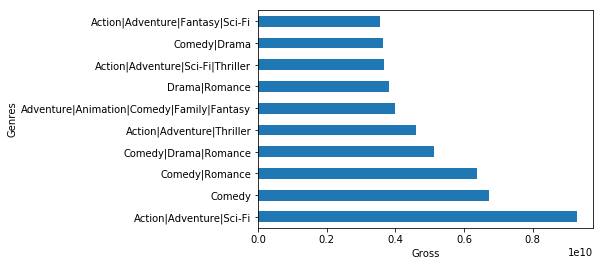

In [161]:
_ = gross_sum_top10.plot(kind='barh')
_ = plt.xlabel('Gross')
_ = plt.ylabel('Genres')
plt.show()